Using the Image class

In [0]:
from PIL import Image
im = Image.open("/content/MyImge_.jpg")
im = im.resize((128, 128))

In [100]:
from __future__ import print_function
print(im.format, im.size, im.mode)

None (128, 128) RGB


### Reading and writing images

Convert files to JPEG

In [101]:
from __future__ import print_function
import os, sys
from PIL import Image

for infile in sys.argv[1:]:
    f, e = os.path.splitext(infile)
    outfile = f + ".jpg"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("cannot convert", infile)

cannot convert -f
cannot convert /root/.local/share/jupyter/runtime/kernel-95e423b5-8230-4449-833f-be8b606c1dd2.json


Create JPEG thumbnails

In [102]:
from __future__ import print_function
import os, sys
from PIL import Image

size = (128, 128)

for infile in sys.argv[1:]:
    outfile = os.path.splitext(infile)[0] + ".thumbnail"
    if infile != outfile:
        try:
            im = Image.open(infile)
            im.thumbnail(size)
            im.save(outfile, "JPEG")
        except IOError:
            print("cannot create thumbnail for", infile)

cannot create thumbnail for -f
cannot create thumbnail for /root/.local/share/jupyter/runtime/kernel-95e423b5-8230-4449-833f-be8b606c1dd2.json


### Cutting, pasting, and merging images

Copying a subrectangle from an image

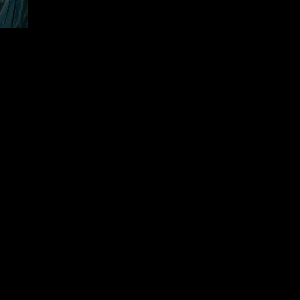

In [103]:
box = (100, 100, 400, 400)
region = im.crop(box)
region

Processing a subrectangle, and pasting it back

In [0]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)

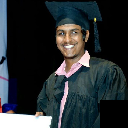

In [105]:
im

Rolling an image

In [0]:
def roll(image, delta):
    "Roll an image sideways"

    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0: return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize-delta, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))

    return image

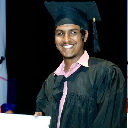

In [121]:
im = Image.open("/content/MyImge_.jpg")
im = im.resize((128, 128))
im_ = roll(im,1)
im_ 

Splitting and merging bands

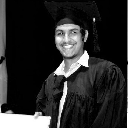

In [122]:
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))
r

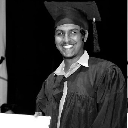

In [123]:
g

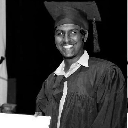

In [124]:
b

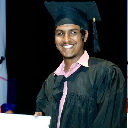

In [125]:
im = Image.merge("RGB", (r, g,b))
im

### Geometrical transforms

Simple geometry transforms

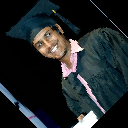

In [126]:
im = im.resize((128, 128))
out = im.rotate(45) # degrees counter-clockwise
out

Transposing an image

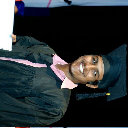

In [127]:
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out = im.transpose(Image.ROTATE_90)
out = im.transpose(Image.ROTATE_180)
out = im.transpose(Image.ROTATE_270)
out

### Color transforms

Converting between modes

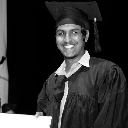

In [135]:
im = Image.open("/content/MyImge_.jpg").convert("L")
im = im.resize((128, 128))
im

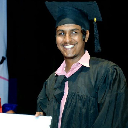

In [137]:
im = Image.open("/content/MyImge_.jpg").convert("RGB")
im = im.resize((128, 128))
im

### Image enhancement

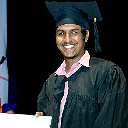

In [138]:
from PIL import ImageFilter
out = im.filter(ImageFilter.DETAIL)
out

Applying point transforms

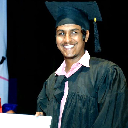

In [139]:
# multiply each pixel by 1.2
out = im.point(lambda i: i * 1.2)
out

Processing individual bands!

syntax used to create the mask:

`imout = im.point(lambda i: expression and 255)`

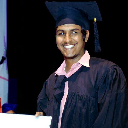

In [140]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)
im

### Enhancement

Enhancing images

In [141]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).show("30% more contrast")
enh

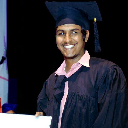

In [142]:
im